Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "In Wai Cheong"
COLLABORATORS = "Ananth Kumar"

---

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 2:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object $f$ and its approximation $F$.  Note, both f and F can be numpy arrays.

In [3]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    # YOUR CODE HERE
 
    f = numpy.array(f)
    F = numpy.array(F)
    e = numpy.array(numpy.abs(f-F))
    r = numpy.array(e/numpy.abs(f))
    p_2 = numpy.array(-numpy.log10(r/5.))
    p = p_2.astype(int)
    
    print('f = {}'.format(f))
    print('F = {}'.format(F))
    print('Absolute Error: {}'.format(e))
    print('Relative Error: {}'.format(r))
    print('Decimal precision: {}'.format(p))
   
    return e, r, p


In [4]:
# test simple scalars
e,r,p = errors(numpy.exp(1),2.72)
numpy.testing.assert_allclose([e,r,p],[0.0017181715409551046, 0.0006320799863232398, 3])

# test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('success')

f = 2.718281828459045
F = 2.72
Absolute Error: 0.0017181715409551046
Relative Error: 0.0006320799863232398
Decimal precision: 3
f = [ 2.71828183  7.3890561  20.08553692]
F = [ 2.718  7.389 20.085]
Absolute Error: [2.81828459e-04 5.60989307e-05 5.36923188e-04]
Relative Error: [1.03678896e-04 7.59216467e-06 2.67318315e-05]
Decimal precision: [4 5 5]
success


**(b)** [4 pts] Use your routine to calculate various errors for two approximations to $\pi$

* $f = \pi$ and $F = 3.14$
* $f = \pi$ and $F = 22 / 7$

Which of these is the better approximation?

In [5]:
x = [numpy.pi,numpy.pi]
y = [3.14,22/7]
errors(x,y)

f = [3.14159265 3.14159265]
F = [3.14       3.14285714]
Absolute Error: [0.00159265 0.00126449]
Relative Error: [0.00050696 0.0004025 ]
Decimal precision: [3 4]


(array([0.00159265, 0.00126449]),
 array([0.00050696, 0.0004025 ]),
 array([3, 4]))

### Answer: $\frac{22}{7}$ is more accurate since it has less absolute and relative error than $3.14$

**(c)** [4 pts] $F = n log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

Note: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

Text(0, 0.5, 'Relative Error')

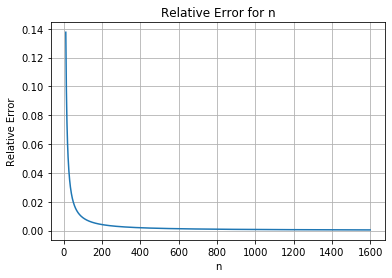

In [6]:
import math

def calc(b):
    if b==0:
        return 1
    else:
        return sum([numpy.log(i) for i in range(1,b+1)])

x = list(range(10,1600))
F = numpy.array([j*numpy.log(j)-j for j in x])
f = numpy.array([calc(i) for i in x])
rel = numpy.abs(f - F) / numpy.abs(f)

plt.plot(x,rel)
plt.grid()
plt.title("Relative Error for n")
plt.xlabel("n")
plt.ylabel("Relative Error")

Text(0, 0.5, 'Degree Precision')

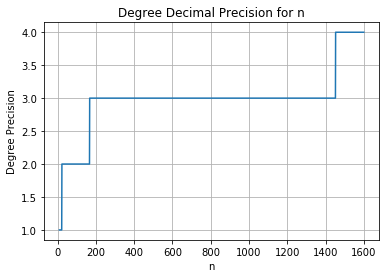

In [7]:
dec = numpy.floor(-numpy.log10(rel/5))
plt.plot(x,dec)
plt.grid()
plt.title("Degree Decimal Precision for n")
plt.xlabel("n")
plt.ylabel("Degree Precision")

The smallest value of $n$ for which Stirling's Approximation would be good to 4 decimal places of precision is at $n \approx 1450$

## Question 2

[4 pts] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $O$).


## Solution

For small values of $\Delta x$, $f+g=p+q+O(\Delta x^r)$ where:
$$
f(\Delta x) = p(\Delta x) + O(\Delta x^n)
$$
$$
g(\Delta x) = q(\Delta x) + O(\Delta x^m)
$$
$$
r = min(n,m)
$$
So, we have:
$$
\frac{1}{1-\Delta x} + \cosh(\Delta x) = (1+\Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4))+(1+\frac{\Delta x^2}{2!}+\frac{\Delta x^4}{4!} + O(\Delta x^6))
$$

We have that $r=min(4,6)=4$ so:
$$
\frac{1}{1-\Delta x} + \cosh(\Delta x) = 2+\Delta x + \Delta x^3+\frac{3 \Delta x^2}{2}+\frac{\Delta x^4}{24}+ O(\Delta x^4)
$$
$$
\fbox { $= 2+\Delta x +\frac{3 \Delta x^2}{2}+\Delta x^3 +O(\Delta x^4)$}
$$

Then for $(\frac{1}{1-\Delta x})(\cosh \Delta x):$

$$
f \cdot g = p \cdot q + O(\Delta x^r)
$$

$$
(\frac{1}{1-\Delta x})(\cosh \Delta x) = (1+\Delta x + \Delta x^2 + \Delta x^3)(1+\frac{\Delta x^2}{2!}+\frac{\Delta x^4}{4!})+O(\Delta x^4)
$$
We then have:
$$
(\frac{1}{1-\Delta x})(\cosh \Delta x)=1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + \frac{13 \Delta x^4}{24} + \frac{13 \Delta x^5}{24} + \frac{\Delta x^6}{24} + \frac{\Delta x^7}{24} + O(\Delta x^4)
$$
Finally:
$$
(\frac{1}{1-\Delta x})(\cosh \Delta x)=\fbox{$1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{3 \Delta x^3}{2} + O(\Delta x^4)$}
$$

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

## Solution

We have that $e^x = T_n(x) = R_n(x)$ where $R_n(x)$ is the residual with:

$$
R_n = \frac{f^{n+1}(c)(x-x_{0})^{n+1}}{(n+1)!}
$$

Then: 

$$
r_n = \frac {|e^x - T_n(x)|}{|e^x|} = \frac {|R_n(x)|}{|e^x|}
$$

That becomes: (Note: $x_0 = 0$)

$$
r_n=\frac{f^{n+1}(c)(x-x_{0})^{n+1}}{(n+1)!|e^x|} = \frac{e^cx^{n+1}}{(n+1)!|e^x|} \leq \frac{x^{n+1}}{(n+1)!}
$$

**(b)** [4 pts] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

## Solution

We need to show that:

$$
\frac{x^{n+1}}{(n+1)!} \leq \epsilon_{machine}
$$

We then have:

$$
x^{n+1}<(n+1)!
$$

Taking $log$ of both sides:

$$
(n+1)log(x) < (n+1)log(n+1)-(n+1)
$$
$$
log(x) < log(n+1) - 1 
$$
$$
log(x) + 1 <log(n+1) 
$$
$$
log(x) + log(e) < log(n+1)
$$

For large values of $n$, $log(n+1) = log(n)$:

$$
log(x) + log(e) < log(n)
$$
$$
log(e \cdot x) < log(n)
$$
$$
n > e \cdot x
$$

We are done.

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $Tn(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_N(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [8]:
def Tn_exp(x):
    """ Write a decent description here
    
    Function to calculate e^x using Taylor series approximation about x0 = 0
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """
    assert(isinstance(x,float))
    
    use_inv = False
    if x<0:
        x = abs(x)
        use_inv = True
        
    MAX_N = int(numpy.ceil(3*x))+50
    
    p = []
    for n in range(MAX_N + 1):
        p.append(1 / factorial(n))    
    p.reverse()    
    
    Tn = p[0]
    for coefficient in p[1:]:
        Tn = Tn * x + coefficient
        
    if use_inv:
        Tn = 1/Tn

                        
    
    return Tn, MAX_N

In [9]:
x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [33]:
#Check Relative Error in units of machine epsilon between f=numpy.exp(709) and my routine

f = numpy.exp(709)
F = Tn_exp(709.)[0]

rel_error = abs(f-F)/abs(f)
print("Relative Error is:",rel_error/eps,"machine epsilons.")

#Check relative error in units of machine epsilon between numpy.exp(1)**709 and numpy.exp(709)
d = numpy.exp(709)
D = numpy.exp(1)**709

rel_error2 = abs(d - D) / abs(d)
print("Relative Error is:",rel_error2/eps, "machine epsilons.")

Relative Error is: 4503599627370496.0 machine epsilons.
Relative Error is: 170.0702257577037 machine epsilons.


## Solution

Relative Error is: 4503599627370496.0 machine epsilons. <br>
(Between f = numpy.exp(709) and my routine)

Relative Error is: 170.0702257577037 machine epsilons. <br>
(Between f = numpy.exp(709) and F = numpy.exp(1)**709

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-2, 2]$.

**(a)** [4 pts] Calculate how many numbers can we represent with this system?  What are the underflow and overflow limits?

## Solution

To calculate the numbers we can represent with this system:
$$d_1 = [1,2,3]$$
$$d_2 = [0,1,2,3]$$
$$d_3 = [0,1,2,3] $$
$$E = [-2,-1,0,1,2]$$
$$f = \pm d_1.d_2d_3 \times 4^E = 2 \times 3 \times 4 \times 4\times 5 + 1 = 481 $$

Underflow: $1.00 \times 10^{-2} = 0.01$ <br>
Overflow: $3.33 \times 10^2= 333$

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

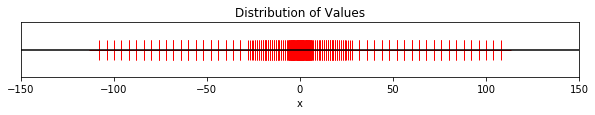

In [13]:
# YOUR CODE HERE

d_1_values = [1,2,3]
d_2_values = [0,1,2,3]
d_3_values = [0,1,2,3]
E_values = [2,1,0,-1,-2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 + d3 * 0.25) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 + d3 * 0.25) * 4**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-150, 150], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-150,150])
plt.show()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-2,2]$ for both problems)?

From part (a), we saw that in base 4, our number of represenstations with $p=3$ and $E \in [-2,-2]$ is: 

$$ 2 \times 3 \times 4 \times 4 \times 5+1 = 481$$
<br>
For base 2: <br>
$d_1 = [1,2,3]$ <br>
$d_2 = [0,1,2,3]$ <br>
$d_3 = [0,1,2,3]$ <br>
$E = [-2,-1,0,1,2]$ <br>
<br>
That gives us: $2 \times 1 \times 2 \times 2 \times 5 + 1 = 41$ as the number of representations. <br>
That means we can store $481 - 41 = 440$ more numbers.